In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
pd.options.display.max_rows = 20

import pickle

path_models = 'models/'

In [2]:
df = pd.read_csv("dataset/Dataset_12classes.csv")
df

,category,text,label_cat
0,01_auto.txt,АвтоВАЗ жол талғамайтын көліктерге жеңілдік бе...,0
1,01_auto.txt,АвтоВАЗ екінші буын Granta және Kalina модельд...,0
2,01_auto.txt,Avtopole Honda Accord Sport-қа назар аударады ...,0
3,01_auto.txt,«Бомбил» қорқып кетті. Енді жоқ ... Санкт-Пете...,0
4,01_auto.txt,Әскери өнеркәсіп компаниясы гибридті электр ст...,0
...,...,...,...
22022,12_travel.txt,Осы қарсаңда АҚШ-тың арнайы қызметтері бірнеше...,11
22023,12_travel.txt,Wizz Air әуе компаниясының Бухаресттен (Румыни...,11
22024,12_travel.txt,Сіз сондай-ақ қыста жаздың күн сәулесінен раха...,11
22025,12_travel.txt,Сыраның барлық әуесқойлары үшін нағыз мереке б...,11


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['label_cat'] = le.fit_transform(df['category'])
df

,category,text,label_cat
0,01_auto.txt,АвтоВАЗ жол талғамайтын көліктерге жеңілдік бе...,0
1,01_auto.txt,АвтоВАЗ екінші буын Granta және Kalina модельд...,0
2,01_auto.txt,Avtopole Honda Accord Sport-қа назар аударады ...,0
3,01_auto.txt,«Бомбил» қорқып кетті. Енді жоқ ... Санкт-Пете...,0
4,01_auto.txt,Әскери өнеркәсіп компаниясы гибридті электр ст...,0
...,...,...,...
22022,12_travel.txt,Осы қарсаңда АҚШ-тың арнайы қызметтері бірнеше...,11
22023,12_travel.txt,Wizz Air әуе компаниясының Бухаресттен (Румыни...,11
22024,12_travel.txt,Сіз сондай-ақ қыста жаздың күн сәулесінен раха...,11
22025,12_travel.txt,Сыраның барлық әуесқойлары үшін нағыз мереке б...,11


In [15]:
with open(path_models+'class_names.pickle', 'wb') as handle:
    pickle.dump(np.array([i.replace('.txt', '') for i in le.classes_]), handle, protocol=pickle.HIGHEST_PROTOCOL)

le.classes_

array(['01_auto.txt', '02_economics_business.txt', '03_entertainment.txt',
       '04_family.txt', '05_fashion.txt', '06_games.txt', '07_health.txt',
       '08_politics.txt', '09_realty.txt', '10_science_hitech.txt',
       '11_sport.txt', '12_travel.txt'], dtype=object)

In [5]:
import re

def cleaning_data(code_data):
    text = code_data
    text = text.replace('(<br/>)', '')
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = filtering(text)
    return text.strip()

def filtering(text):
    stripped = re.sub('[^a-zA-Z, ^А-Я,а-я,Ә,І,Ң,Ғ,Ү,Ұ,Қ,Ө,Һ,ә,і,ə,ң,ғ,ү,ұ,қ,ө,һ]', ' ', str(text).replace('-', ''))
    stripped = re.sub('_', '', stripped)
    stripped = re.sub('\s+', ' ', stripped)
    return str(stripped).lower()

In [6]:
X = pd.DataFrame(list(map(cleaning_data, df.text)))[0]
y = df.label_cat
X

0        автоваз жол талғамайтын көліктерге жеңілдік бе...
1        автоваз екінші буын granta және kalina модельд...
2        avtopole honda accord sport қа назар аударады ...
3        бомбил қорқып кетті енді жоқ санкт петербург п...
4        әскери өнеркәсіп компаниясы гибридті электр ст...
                               ...                        
22022    осы қарсаңда ақш тың арнайы қызметтері бірнеше...
22023    wizz air әуе компаниясының бухаресттен румыния...
22024    сіз сондай ақ қыста жаздың күн сәулесінен раха...
22025    сыраның барлық әуесқойлары үшін нағыз мереке б...
22026    нағыз талғампаздар мерекесі маусымның соңында ...
Name: 0, Length: 22027, dtype: object

In [7]:
y = y[(X != '').values]
X = X[(X != '').values]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(len(X_train))
print(len(X_test))

17621
4406


In [9]:
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(lowercase=True, sublinear_tf=True, smooth_idf=True, max_df=0.5, min_df=0.001)
x_train_tf = vectorizer.fit_transform(X_train)
x_test_tf = vectorizer.transform(X_test)
print(x_train_tf.shape)

with open(path_models+'vectorizer.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

(17621, 17189)


In [10]:
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='Greens'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


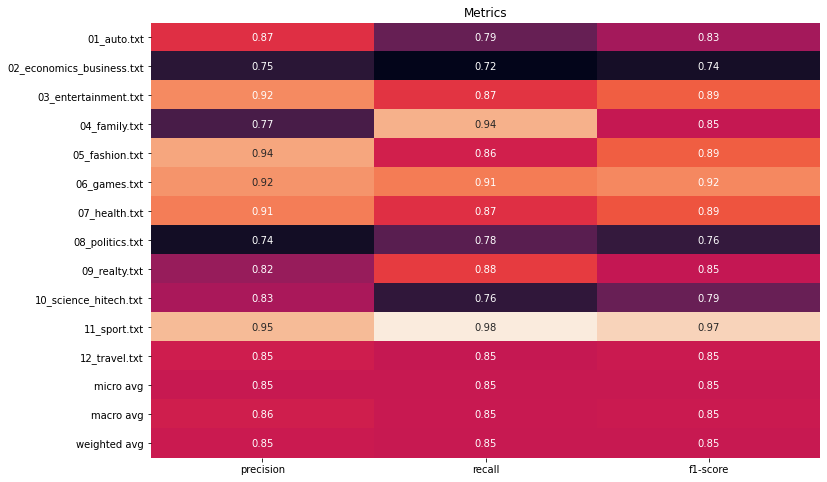

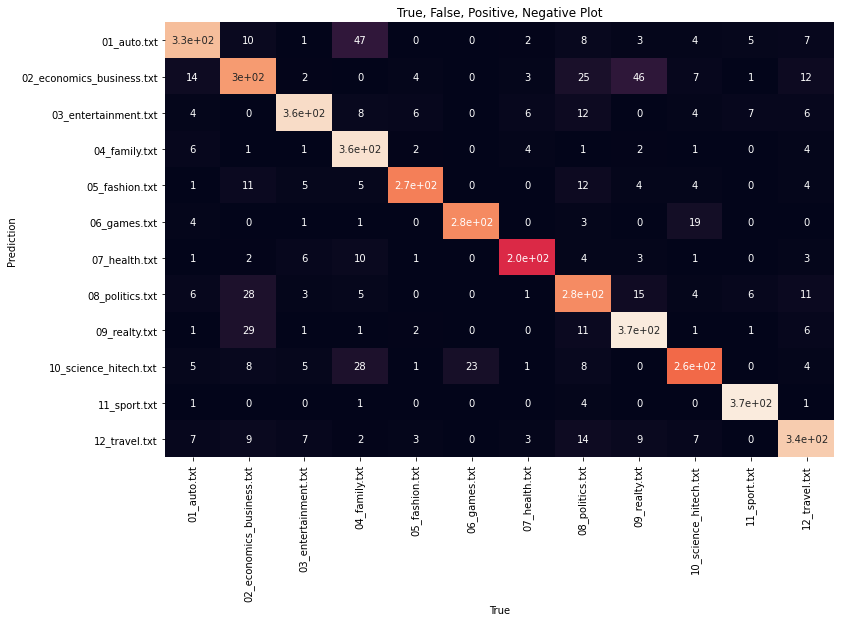

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tf, y_train)

with open(path_models+'modellr.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

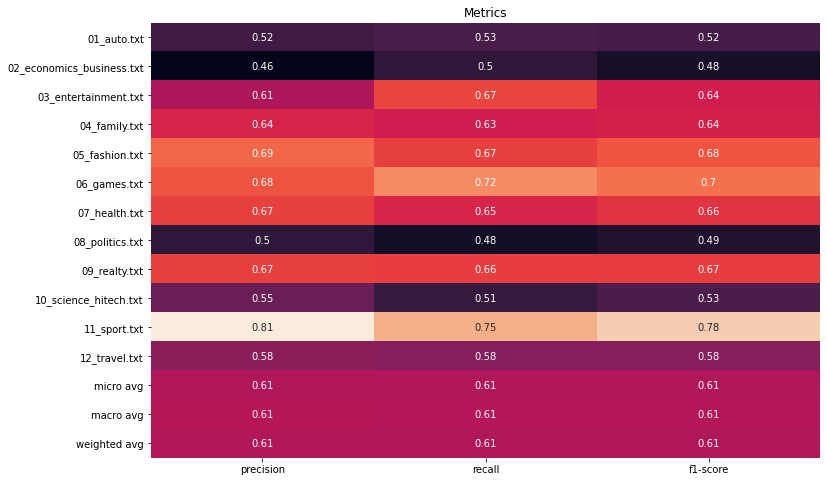

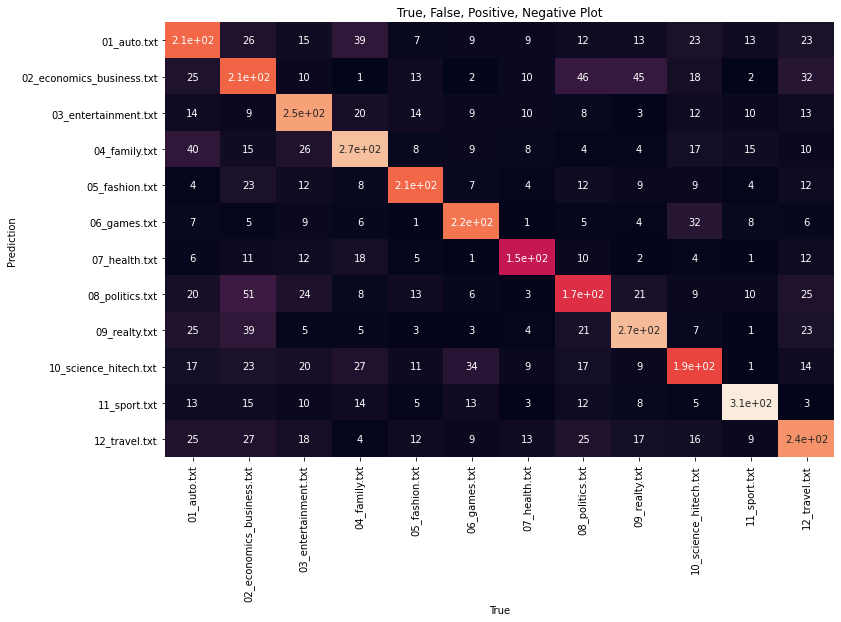

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


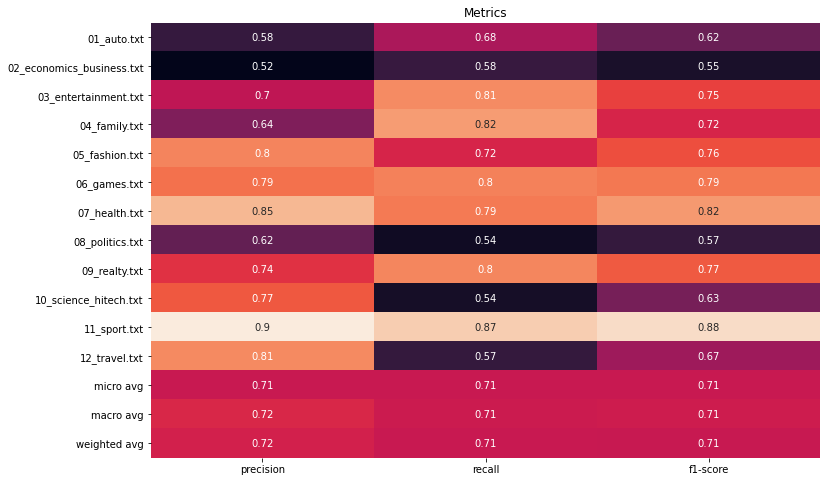

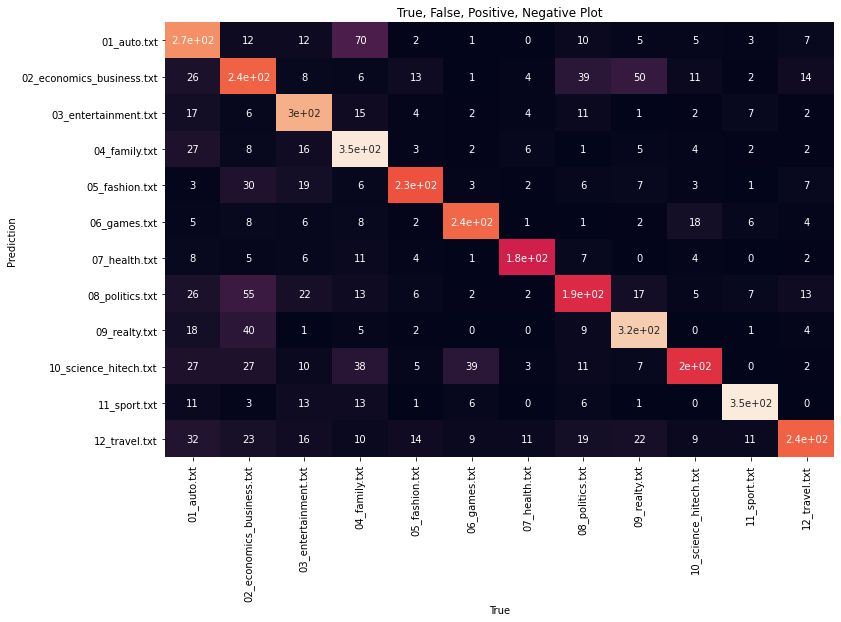

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

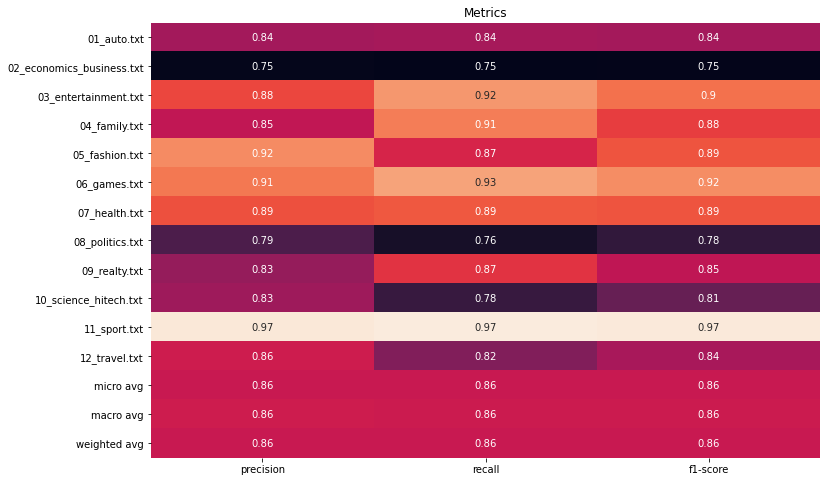

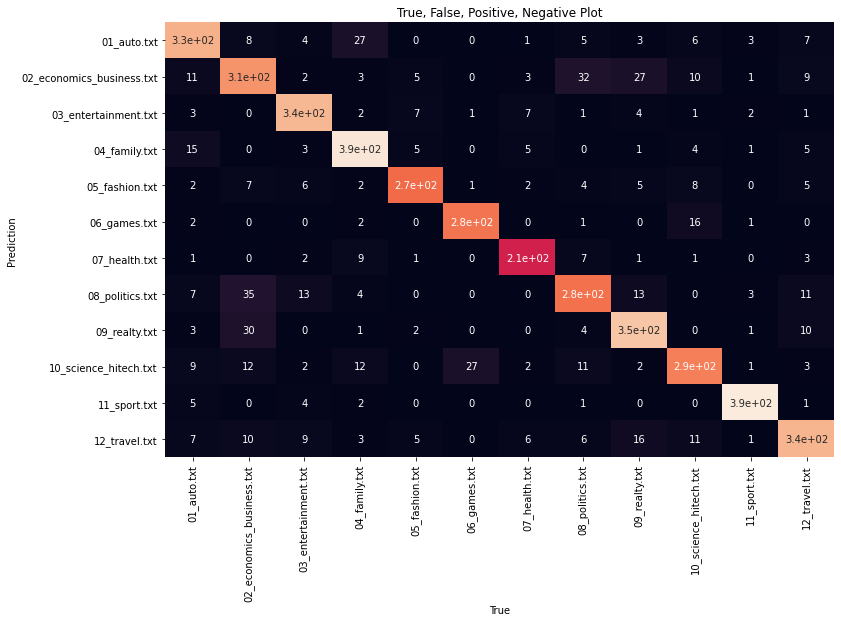

In [14]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

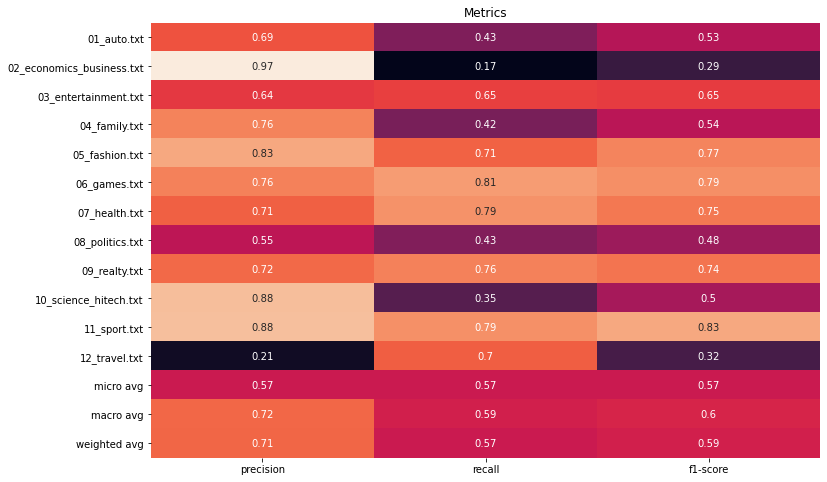

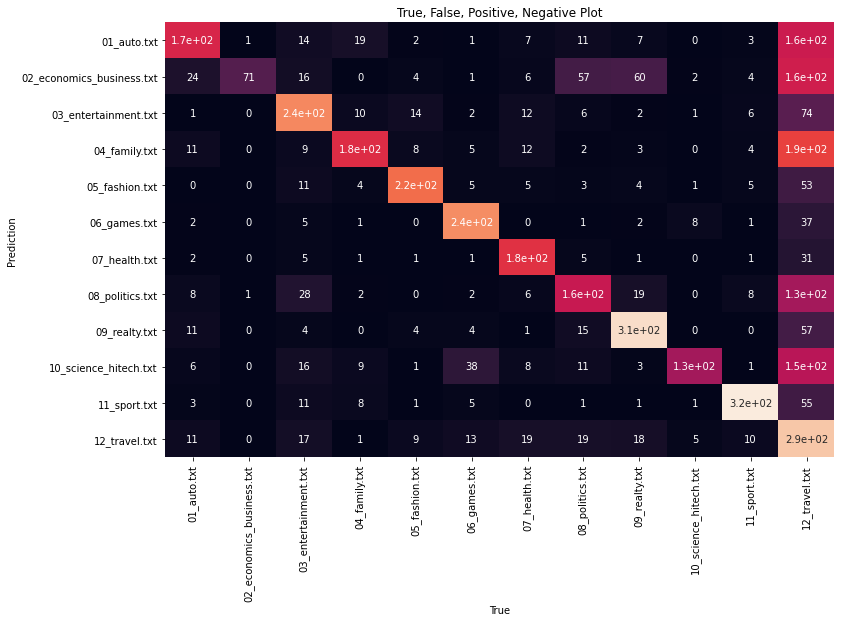

In [15]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


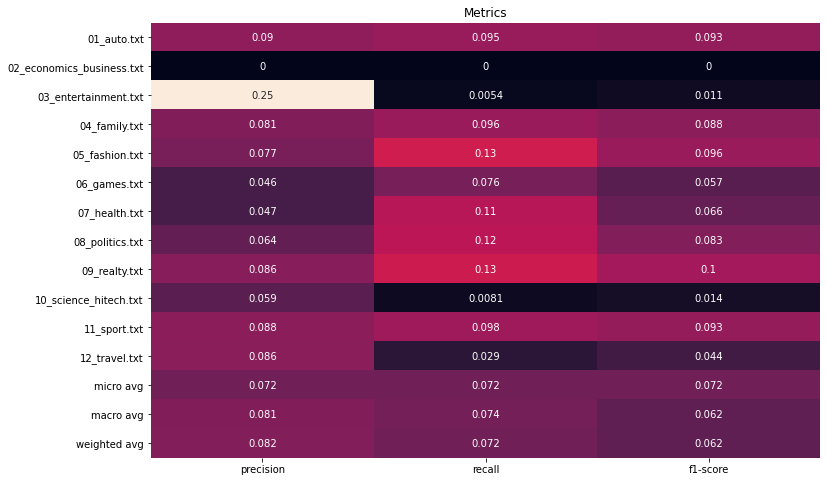

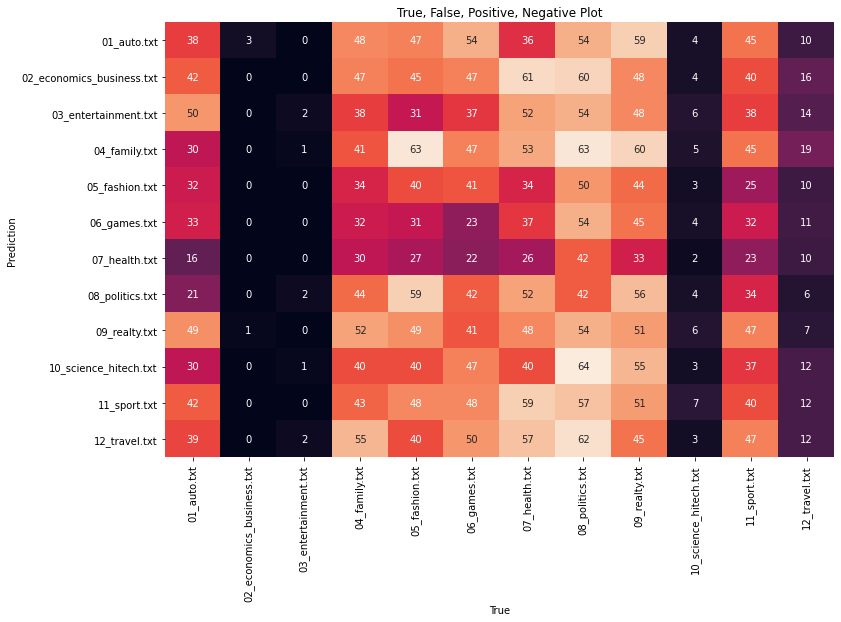

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(x_train_tf.toarray(), y_train)

predictions = model.predict(x_test_tf.toarray())

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


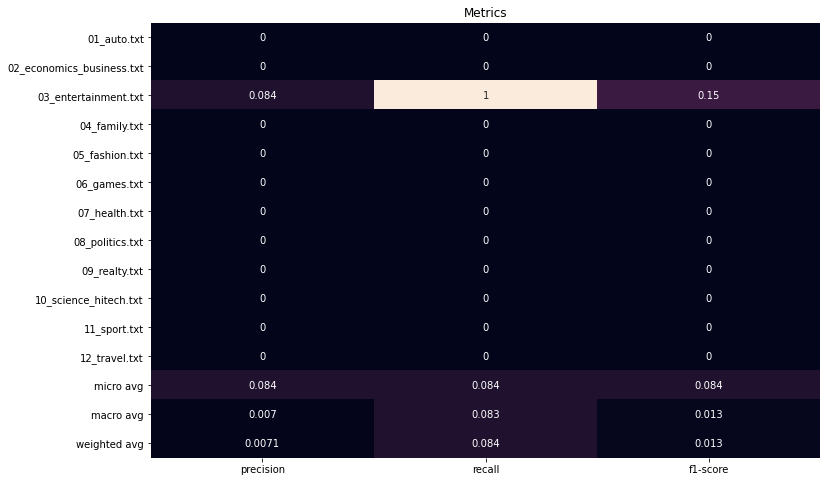

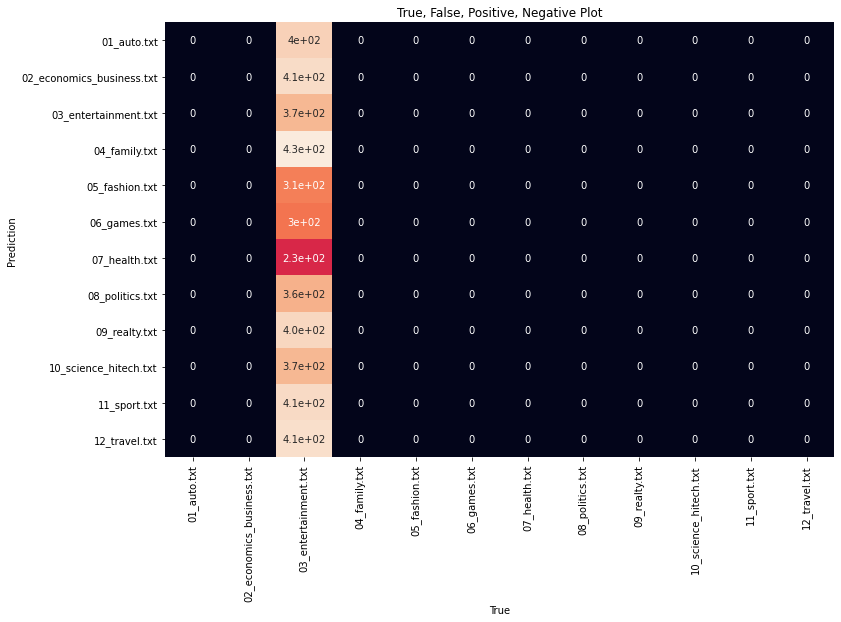

In [18]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

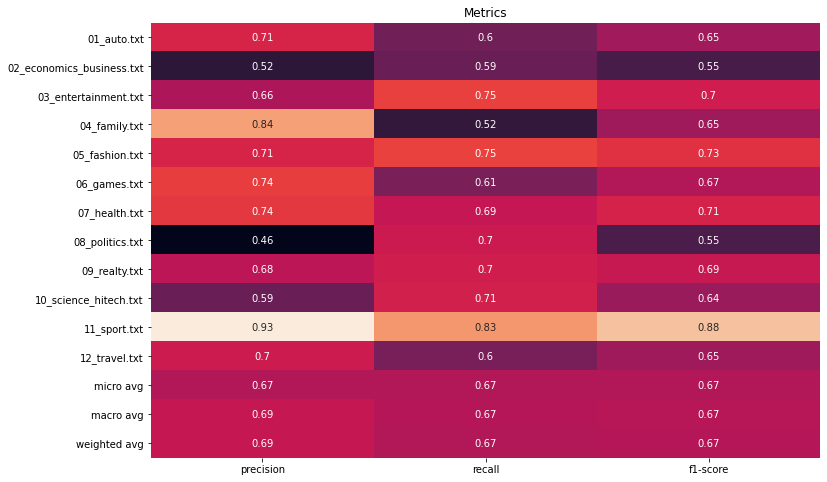

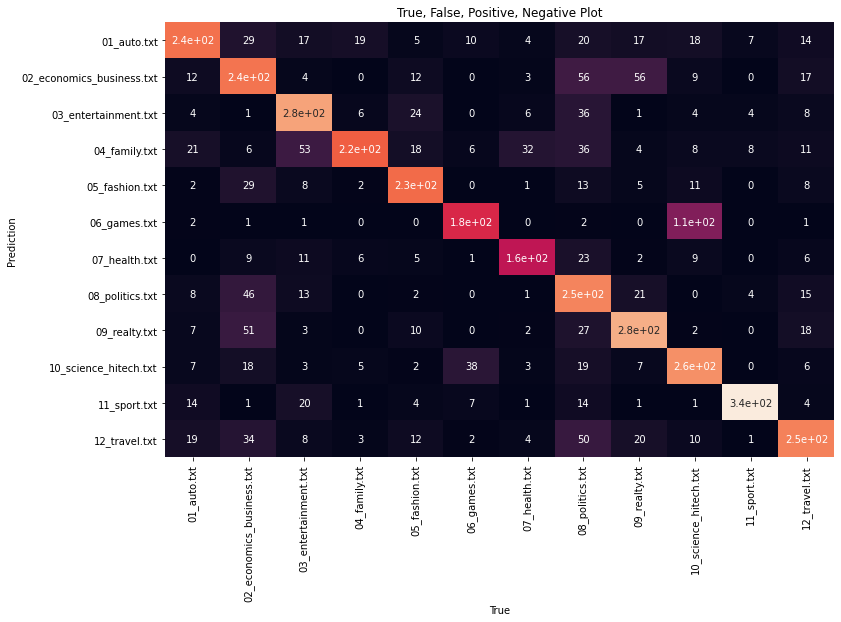

In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_tf.toarray(), y_train)

predictions = model.predict(x_test_tf.toarray())

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=le.classes_)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()